<font size="6"> Part V Lesson 1</font>

# Preamble

## Prerequisites

- Numpy arrays
- For loops
- Basic matplotlib plotting
- A basic understanding of functions

## Outcomes

- Plot functions represting solutions to differential equations


## Estimated duration

5 hours

# Bacterial growth
Here we see how thinking in terms of reactions can be useful to describe populations of cells. We will consider three different processes within bacterial growth. 

## Simple growth
Consider the model of bacterial growth 
$$N \rightarrow 2N$$

In Lesson 2 we will see how this reaction gives rise to a differential equation but here we will just look at a solution given by
$$N = N_0 exp( kt )$$
where $N_0$ is the intial number of bacteria (at time $t=0$).

We will assume that for our bacteria $k=0.03 min^{-1}$, (which we will see below corresponds to a doubling time of around 23 minutes). The following code plots the growth of the bacteria.


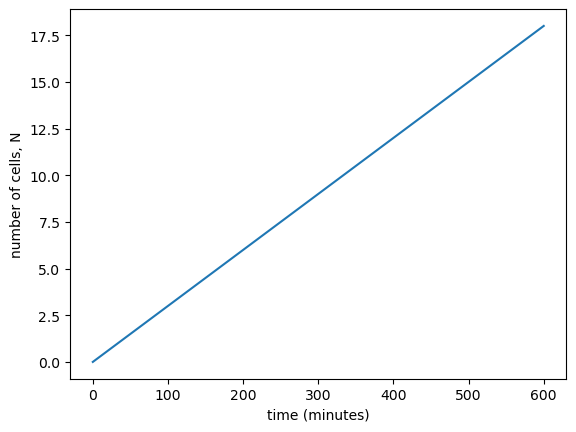

In [10]:
from numpy import *
import matplotlib.pyplot as plt

# this defines a function. 
# Input: time t and a parameter array p = [N0, k]
# Output: N0*exp(kt)
def exp_growth(t, p):
    N0 = p[0]
    k = p[1]
    N = N0*exp(k*t)
    return N

# define the parameters: N0 and k
N0 = 1
k = 0.03
p = [N0, k]

# define the time range that we want to integrate
t_end = 600
times = arange(0, t_end, 0.1)
ntimes = len(times)

# create an empty array, y, to hold the results
y = zeros([ntimes])

# fill y with the values 
for i in range(ntimes):
    y[i] = exp_growth(times[i], p)

# make a plot
plt.plot( times, log(y))
plt.xlabel('time (minutes)')
plt.ylabel('number of cells, N')
plt.show()

__DIY: Properties of exponential growth__
>
> i) Modify N0 and k in the above code. What is their effect on the growth curve?<br>
> ii) Instead of plotting y, plot log(y). What do you notice? <br>
    

N0 - no effect
k - changes the rate of exponential growth
log(y) chages the j-shaped curve to a linear correlation

When dealing with exponetial growth the doubling time is a realy useful quantity. It quantifies the time for the population to double and is measured in units of time (eg seconds, minutres). Doubling time and rate constant are related via the equation:
$$ \text{doubling time} = \frac{ln(2)}{k} $$

__DIY: Write your own functions__
>
> i) Write a function to convert a value of k to a doubling time. Use the template below.<br>
> ii) Verify that a rate constant, k= 0.04, gives a doubling time of 17.3 minutes<br>
> iii) What is the doubling time when $k=0.03$ ?<br>
> iv) Write a function to do the inverse: convert a doubling time to a value of k  

In [13]:
import math

# define function
def convert_k_to_double_time(k):
    dt = log(2)/k
    return dt

# run the function
k = 0.04
double_time = convert_k_to_double_time(k)
print(k, double_time)

0.04 17.328679513998633


In [14]:
def convert_dt_to_k(dt):
    k = log(2)/dt
    return k

__DIYN: Modelling bacterial growth__
> 
> A colony of 250 E. coli bacteria has a cell cycle of 15 minutes. Its population growth can be modelled with exponential growth. <br>
i) What is the value of $k$ for this colony? <br>
ii) Plot the population over 2 hours. 

## Bacterial death
Now we are going to assume that the colony is treated with an antibiotic. The antibiotic causes cell death by lysing, bursting open the cell wall. We will assume each cell has the same chance of lysing. This can be modelled by the reaction
$$N \rightarrow 0$$
which has a solution
$$N = N_0 exp( -kt )$$

where $N_0$ is the intial number of bacteria (at time $t=0$). This is known as **exponetial decay**, which you may have come across in the context of radioactivity.

Let us now assume that we have prepared a colony of bacteria ($1×10^6$ individuals) from a culture growing in a rich medium and placed them into another petri dish containing the antibiotic. We assume that $k=0.01 min^{-1}$. The following code plots the number of cells as a function of time.

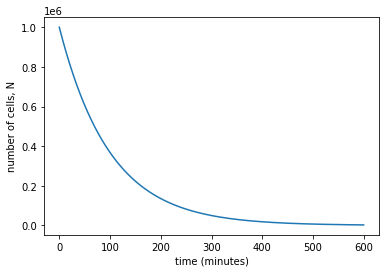

In [2]:
from numpy import *
import matplotlib.pyplot as plt

def exp_decay(t, p):
    N0 = p[0]
    k = p[1]
    N = N0*exp(-k*t)
    return N

# define the parameters
N0 = 1e6
k = 0.01
p = [N0, k]

# define the time range that we want to integrate
t_end = 600
times = arange(0, t_end, 0.1)
ntimes = len(times)

y = zeros([ntimes])
for i in range(ntimes):
    y[i] = exp_decay(times[i], p)

# make a plot
plt.plot( times, y )
plt.xlabel('time (minutes)')
plt.ylabel('number of cells, N')
plt.show()

Here $k$ is known as the **decay rate** or sometimes the **decay constant**. A useful concept when thinking about exponential decay is know as the **half life**, denoted $t_{1/2}$, which is the time required for the population to reduce to half of its initial value. Decay rate and half-life are related by the following
$$ k = \frac{ln(2)}{t_{1/2}} $$

__DIY: Half-life__
> 
> i) Write a python function to relate the half-life to the decay constant <br>
> ii) What is the half-life when $k=0.1$? <br>
> iii) At what time does the population  number $N=N_0/16$? 


__DIY: Exponential decay__
> 
> An E-coli colony has a population which falls by 50% every 4 hours. <br>
> i) Calculate the decay constant for the population.<br>
> ii) Define a function to model the population if its initial value is 1,000,000 bacteria. Use the function to plot the number of cells over time and to calculate the population after 24 hours.


## Logistic growth
Unlimited bacterial growth is not a very realistic model for most situations. Of course the optimal growth conditions can only exist for a limited time before the bacteria have to compete for available resources. One way of modelling this density dependence is by using the logistic growth model

$$ N = \frac{ C N_0 exp(kt) }{ C - N_0 + N_0 exp(kt) } $$


The code below defines a function to model the behaviour of the population, $N$, as a function of time and plots the resultant trajectory. The three parameters are set as follows $N_0 =10$, $k=0.03$ and $C=1000$. (Although 1000 bacteria is not realistic for a colony we can imagine we are looking at a microcolony in a microfluidic device!). Notice that the population reaches a steady state around $N = 1000$.

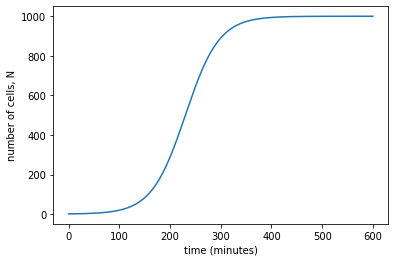

In [3]:
from numpy import *
import matplotlib.pyplot as plt

def logistic_growth(t, p):
    N0 = p[0]
    k = p[1]
    C  = p[2]
    N = C*N0*exp(k*t)/(C - N0 + N0*exp(k*t))
    return N

# define parameters
N0 = 1
k = 0.03
C = 1000
p = [N0, k, C]

# define the time range that we want to integrate
t_end = 600
times = arange(0, t_end, 0.1)
ntimes = len(times)

y = zeros([ntimes])
for i in range(ntimes):
    y[i] = logistic_growth(times[i], p)

# make a plot
plt.plot( times, y, label='u' )
plt.xlabel('time (minutes)')
plt.ylabel('number of cells, N')
plt.show()

__DIY2: Exploring the logistic model__
> 
> i) Modify the code above to plot two trajectories corresponding to $N_0=100$ and $N_0=1500$, keeping the other parameters fixed. Colour them blue and red respectively. <br> 
> ii) Modify the code to look at the effect of increasing and decreasing $k$ <br>
> iii) Explore what happens when you change $C$ <br>
> iv) Describe what you notice in each case 

Here you should see that parameter $C$ sets the maximum sustainable population. This is known as the **carrying capacity**. If the population starts below this value then the population grows until $C$ is reached. Alternatively, if the population starts above $C$ then we get exponential decay until $C$ is reached.

__DIY3__: Comparing logistic and exponential growth
> i) Write some code to plot both the logistic model and the exponential model. <br>
> Hint: assume $k=0.03$ and plot up to $t=200$ minutes <br>
> ii) What do you notice?

Here you should see that the behaviours of the exponential growth and logistic models are identical at short times (up to around 100 minutes)